# Ejercicio 1

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
import plotly.express as px
from datetime import date
from datetime import datetime
%matplotlib inline

In [2]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

In [3]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
from PIL import Image

d_name = 'data/faces/rawdata'
X = []
for nfile in  os.listdir(d_name):
    bytes_read = open(os.path.join(d_name,nfile), "rb").read()
    img = Image.frombytes('L', (128,128), bytes_read)
    X.append(np.array(img).flatten())

X = np.array(X)

In [4]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

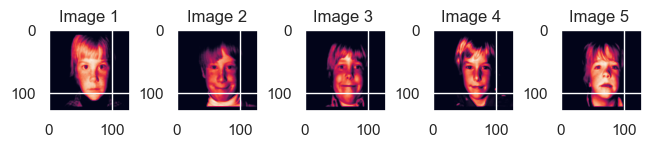

In [5]:
def plot_5_images(data,ix_1, ix_2 , ix_3, ix_4, ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_3]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()
plot_5_images(X,1, 2, 3, 4, 5)

In [6]:
def plot_n_images(data,n=1):
    fn_shape = lambda x: x.reshape(128,128)
    fig, ax = plt.subplots(1,n, constrained_layout=True)
    if n == 1:
        ax.imshow(fn_shape(data))
        ax.set_title(label="Image %s"% str(n))
    else:
        for i in range(n):
            ax[i].imshow(fn_shape(data[i]))
            ax[i].set_title(label="Image %s"% str(i+1))
    plt.show()

In [7]:
X_mean = X.mean(axis=0)
X_center = X - X_mean

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

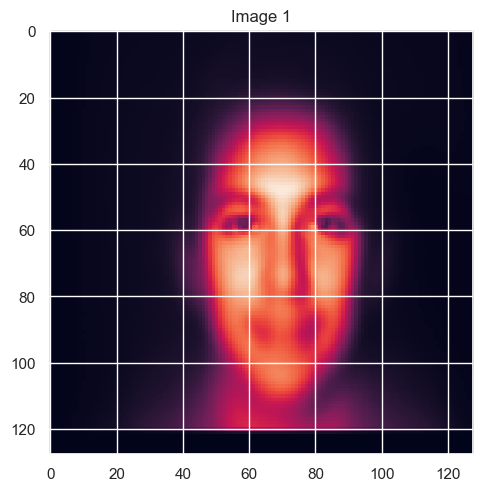

In [8]:
plot_1_images(X_mean)

### 2. PCA

2.1 Centrar

In [9]:
x_center = X - X_mean

2.2 EigenFaces y EigenValues

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=700)
X_reduced = pca.fit_transform(x_center)

In [11]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.32899813, 0.42589729, 0.50936353, 0.55317853, 0.59316252,
       0.62861245, 0.65654767, 0.67537477, 0.69160962, 0.70486311,
       0.7151311 , 0.72533207, 0.73407444, 0.74243094, 0.75008006,
       0.75717165, 0.76402061, 0.77052349, 0.77613818, 0.78153153,
       0.7867906 , 0.79181462, 0.79650494, 0.80105448, 0.80533513,
       0.80939868, 0.81322072, 0.81686706, 0.8203331 , 0.82364706,
       0.82677309, 0.82978946, 0.83270684, 0.83549755, 0.83816703,
       0.84076534, 0.8432306 , 0.84567601, 0.84801365, 0.85025681,
       0.85245694, 0.85458869, 0.85665014, 0.85863352, 0.86056379,
       0.8624266 , 0.86426448, 0.866076  , 0.86775362, 0.86941476,
       0.87101456, 0.87256346, 0.87407455, 0.87557225, 0.87701541,
       0.87838855, 0.87975567, 0.8810898 , 0.88241137, 0.88368933,
       0.88495002, 0.88617824, 0.88737094, 0.88854908, 0.88968729,
       0.8908084 , 0.89189417, 0.89297391, 0.89404174, 0.89508525,
       0.8961037 , 0.89710375, 0.89809835, 0.89907808, 0.90002

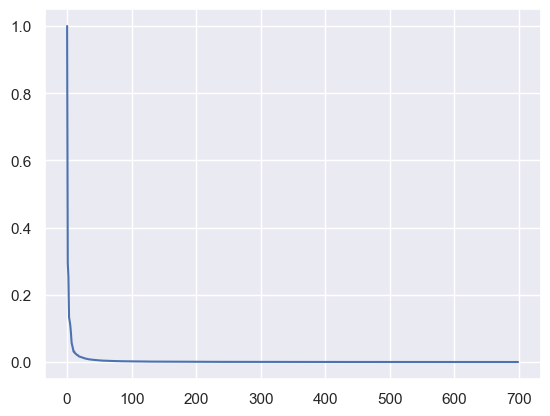

In [12]:
plt.plot(range(0,700), eigen_values/eigen_values[0])

2.2.1 COMPONENTES PARA MANTENER EL 90% DE LAS CARACTERÍSTICAS

In [13]:
components_90 = np.argmax(cumulative_variance >= 0.9) + 1
components_90

75

Se necesitan 75 componentes para mantener el 90% de las características

DATOS RECONSTRUIDOS

In [14]:
X_reduced = pca.fit_transform(x_center)

## CARA ORIGINAL

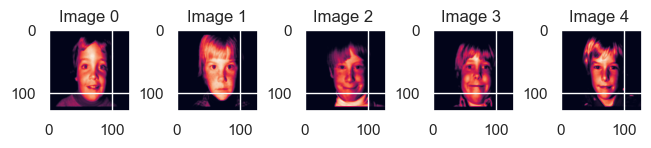

In [15]:
original_faces = [X[0], X[1], X[2], X[3], X[4]]
plot_5_images(original_faces, 0, 1, 2, 3, 4)

## MeanFace + "1"  comp

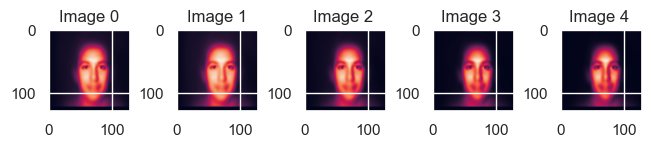

In [16]:
comp1_faces= [
    np.dot(X_reduced[0].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + X_mean,
    np.dot(X_reduced[1].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + X_mean,
    np.dot(X_reduced[2].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + X_mean,
    np.dot(X_reduced[3].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + X_mean,
    np.dot(X_reduced[4].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + X_mean]
plot_5_images(comp1_faces, 0, 1, 2, 3, 4)

## MeanFace + "5" comp

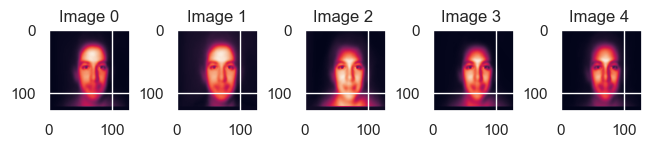

In [17]:
comp5_faces= [
    np.dot(X_reduced[0].reshape(1,-1)[:,:5], eigen_faces[:5,:]) + X_mean,
    np.dot(X_reduced[1].reshape(1,-1)[:,:5], eigen_faces[:5,:]) + X_mean,
    np.dot(X_reduced[2].reshape(1,-1)[:,:5], eigen_faces[:5,:]) + X_mean,
    np.dot(X_reduced[3].reshape(1,-1)[:,:5], eigen_faces[:5,:]) + X_mean,
    np.dot(X_reduced[4].reshape(1,-1)[:,:5], eigen_faces[:5,:]) + X_mean]
plot_5_images(comp5_faces, 0, 1, 2, 3, 4)

## MeanFace + "10" Comp

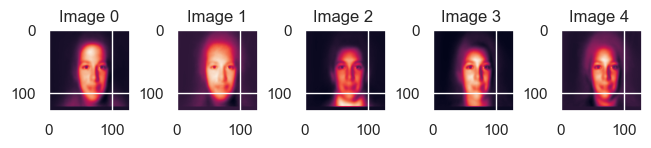

In [18]:
comp10_faces= [
    np.dot(X_reduced[0].reshape(1,-1)[:,:10], eigen_faces[:10,:]) + X_mean,
    np.dot(X_reduced[1].reshape(1,-1)[:,:10], eigen_faces[:10,:]) + X_mean,
    np.dot(X_reduced[2].reshape(1,-1)[:,:10], eigen_faces[:10,:]) + X_mean,
    np.dot(X_reduced[3].reshape(1,-1)[:,:10], eigen_faces[:10,:]) + X_mean,
    np.dot(X_reduced[4].reshape(1,-1)[:,:10], eigen_faces[:10,:]) + X_mean]
plot_5_images(comp10_faces, 0, 1, 2, 3, 4)

## MeanFace + "90%" comp

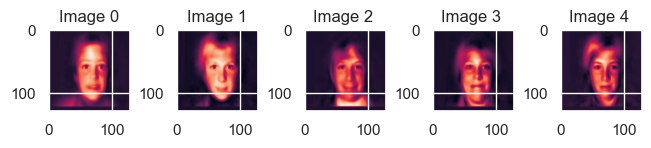

In [19]:
comp90Percent_faces= [
    np.dot(X_reduced[0].reshape(1,-1)[:,:components_90],eigen_faces[:components_90,:]) + X_mean,
    np.dot(X_reduced[1].reshape(1,-1)[:,:components_90],eigen_faces[:components_90,:]) + X_mean,
    np.dot(X_reduced[2].reshape(1,-1)[:,:components_90],eigen_faces[:components_90,:]) + X_mean,
    np.dot(X_reduced[3].reshape(1,-1)[:,:components_90],eigen_faces[:components_90,:]) + X_mean,
    np.dot(X_reduced[4].reshape(1,-1)[:,:components_90],eigen_faces[:components_90,:]) + X_mean]
plot_5_images(comp90Percent_faces, 0, 1, 2, 3, 4)

## MeanFace + "99%" Comp

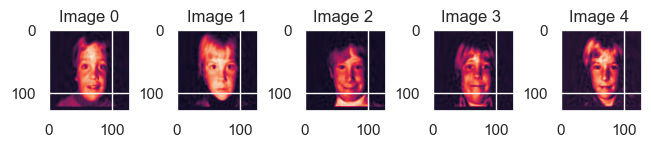

In [20]:
components_99 = np.argmax(cumulative_variance >= 0.99) + 1
comp99Percent_faces= [
    np.dot(X_reduced[0].reshape(1,-1)[:,:components_99],eigen_faces[:components_99,:]) + X_mean,
    np.dot(X_reduced[1].reshape(1,-1)[:,:components_99],eigen_faces[:components_99,:]) + X_mean,
    np.dot(X_reduced[2].reshape(1,-1)[:,:components_99],eigen_faces[:components_99,:]) + X_mean,
    np.dot(X_reduced[3].reshape(1,-1)[:,:components_99],eigen_faces[:components_99,:]) + X_mean,
    np.dot(X_reduced[4].reshape(1,-1)[:,:components_99],eigen_faces[:components_99,:]) + X_mean]
plot_5_images(comp99Percent_faces, 0, 1, 2, 3, 4)

In [21]:
components_99

674

Se puede concluir que entre más componentes se usen, mejor calidad va a tener la imagen 

# Ejercicio "2"

In [22]:
pca = PCA(n_components = 5)
X_reduce = pca.fit_transform(x_center)
eigen_faces = pca.components

AttributeError: 'PCA' object has no attribute 'components'

In [ ]:
class Kmeans:
    
    def __init__(self, k):
        self.k = k
        self.miu = None
        self.his_miu = []
        
    def calculate_labels(self, X):
        dis = np.sum(np.abs(X[:, np.newaxis] - self.miu), axis=2)
        n_l = np.argmin(dis, axis=1).reshape((-1, 1))
        return n_l
    
    def train(self, X, verbose=False):
        X = np.array(X)
        l = np.random.randint(0,high=self.k,size=(X.shape[0],1))
        n_l = None
        while n_l is None or not np.array_equal(l,n_l):
            cur_miu = []
            if n_l is not None:
                l = n_l
            X_l = np.hstack((X,l))
            for i in range(self.k):
                cur_miu.append( 
                    np.mean(
                        X_l[np.where(X_l[:,-1]==i),:-1],
                        axis=1
                    )
                )
            self.miu = np.vstack(cur_miu) 
            self.his_miu.append(self.miu)
            n_l = self.calculate_labels(X)
            if verbose: print(self.miu)
                
    def predict(self,X):
        n_l = self.calculate_labels(X)
        return n_l

In [ ]:
kmeans=Kmeans(7)
kmeans.train(X_reduce)
prediction= kmeans.predict(X_reduce)

In [ ]:
import numpy as np

# Suponiendo que tienes las etiquetas de clúster en 'prediction'
# y que 'X_reduce' es el conjunto de datos original reducido

selected_faces = []

# Recorre cada clúster
for cluster_id in range(7):
    cluster_indices = np.where(prediction == cluster_id)[0]
    cluster_centroid = kmeans.miu[cluster_id]

    # Calcula las distancias desde el centroide del clúster
    distances_to_centroid = [np.linalg.norm(X_reduce[i] - cluster_centroid) for i in cluster_indices]

    # Selecciona las 4 caras más cercanas
    sorted_indices = np.argsort(distances_to_centroid)[:4]

    # Agrega los índices de las caras seleccionadas al resultado
    selected_faces.extend(cluster_indices[sorted_indices])

# 'selected_faces' contendrá los índices de las 4 caras más cercanas al centroide de cada clúster

In [ ]:
#Visualizar las caras
plt.figure(figsize=(10, 10))
for i, face_idx in enumerate(selected_faces):
    plt.subplot(7, 4, i + 1)
    plt.imshow(X[face_idx].reshape(128, 128), cmap='gray')  # Usar X en lugar de data
    plt.title(f'Cluster {prediction[face_idx]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Ejercicio 3

In [ ]:
df = pd.read_csv("./data/Resultados_Saber_TyT_Gen_ricas.csv")

1. Descartar datos innecesarios

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [ ]:
df.describe(include="all")

In [ ]:
def delete_unnecesary_columns(df):
    unnecessary_columns = [x for x in df if df[x].count() <30 or len(df[x].unique()) < 2 or "DISC" in x or "COD" in x]
    unnecessary_columns.extend(['PERIODO','ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD','ESTU_GENERO', 'ESTU_TIPODOCUMENTOSB11', 'ESTU_EXTERIOR', 'ESTU_CONSECUTIVO', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE', 'ESTU_SNIES_PRGMACADEMICO', 'ESTU_PRGM_CODMUNICIPIO', 'ESTU_INST_CODMUNICIPIO','ESTU_PRIVADO_LIBERTAD', 'MOD_INGLES_DESEM', 'ESTU_CONSECUTIVO', 'PERCENTIL_GLOBAL', 'PERCENTIL_NBC', 'ESTU_ESTADOINVESTIGACION'])
    df = df.drop(columns=unnecessary_columns, axis=1)
    categorical = df.drop(columns=df._get_numeric_data().columns, axis= 1)
    df = df.drop(columns=categorical)
    non_significant_categorical = [x for x in categorical if categorical[x].count()-list(categorical[x].value_counts())[0] < 30]
    categorical = categorical.drop(columns=non_significant_categorical, axis=1)
    return pd.concat([df, categorical], axis=1)

In [ ]:
df =  delete_unnecesary_columns(df)

In [ ]:
df.shape[1]

In [ ]:
df.head(5)

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y = df['ESTU_FECHANACIMIENTO'])
scatter_Plot.show()

In [ ]:
def convert_date_to_age(df):
    time = pd.Timestamp('now')
    df['ESTU_EDAD']=(time - pd.to_datetime(df['ESTU_FECHANACIMIENTO'], errors="coerce")).astype('<m8[Y]')
    return df.drop('ESTU_FECHANACIMIENTO', axis=1)

In [ ]:
df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df['ESTU_FECHANACIMIENTO'], errors='coerce')
fecha_minima = pd.Timestamp('1980-01-01')
fecha_maxima = pd.Timestamp('2021-12-31')
fecha_actual = date.today()
df_filtrado = df[(df['ESTU_FECHANACIMIENTO'] >= fecha_minima) & (df['ESTU_FECHANACIMIENTO'] <= fecha_maxima)]
df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df['ESTU_FECHANACIMIENTO'])
df.fillna(df['ESTU_FECHANACIMIENTO'].mean(), inplace=True)
año = df['ESTU_FECHANACIMIENTO'].dt.strftime('%Y').astype(int)
print(fecha_actual)
edad = fecha_actual.year - año
edad.hist(bins=20)

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['ESTU_SEMESTRECURSA'])
scatter_Plot.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['ESTU_SEMESTRECURSA'])
fig.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_RAZONA_CUANTITAT_PUNT'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_RAZONA_CUANTITATIVO_PNAL'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_RAZONA_CUANTITATIVO_PNBC'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_LECTURA_CRITICA_PUNT'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_LECTURA_CRITICA_PNAL'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_LECTURA_CRITICA_PNBC'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMPETEN_CIUDADA_PUNT'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMPETEN_CIUDADA_PNAL'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMPETEN_CIUDADA_PNBC'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_INGLES_PNAL'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_INGLES_PNBC'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMUNI_ESCRITA_PUNT'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMUNI_ESCRITA_DESEM'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMUNI_ESCRITA_PNAL'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMUNI_ESCRITA_PNBC'])
scatter_Plot.show()

In [ ]:
scatter_Plot = px.scatter(df, x=df['MOD_INGLES_PUNT'], y=df['PUNT_GLOBAL'])
scatter_Plot.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_RAZONA_CUANTITAT_PUNT'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_RAZONA_CUANTITATIVO_PNAL'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_RAZONA_CUANTITATIVO_PNBC'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_LECTURA_CRITICA_PUNT'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_LECTURA_CRITICA_PNAL'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_LECTURA_CRITICA_PNBC'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMPETEN_CIUDADA_PUNT'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMPETEN_CIUDADA_PNAL'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMPETEN_CIUDADA_PNBC'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_INGLES_PNAL'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_INGLES_PNBC'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMUNI_ESCRITA_PUNT'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMUNI_ESCRITA_DESEM'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMUNI_ESCRITA_PNAL'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['MOD_COMUNI_ESCRITA_PNBC'])
fig.show()

In [ ]:
fig = px.box(df, x=df['MOD_INGLES_PUNT'], y=df['PUNT_GLOBAL'])
fig.show()

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['ESTU_SEMESTRECURSA'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_RAZONA_CUANTITAT_PUNT'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_RAZONA_CUANTITATIVO_PNAL'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_RAZONA_CUANTITATIVO_PNBC'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_LECTURA_CRITICA_PUNT'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_LECTURA_CRITICA_PNAL'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_LECTURA_CRITICA_PNBC'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_COMPETEN_CIUDADA_PUNT'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_COMPETEN_CIUDADA_PNAL'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_COMPETEN_CIUDADA_PNAL'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_COMPETEN_CIUDADA_PNBC'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_INGLES_PNAL'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_INGLES_PNBC'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_COMUNI_ESCRITA_PUNT'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_COMUNI_ESCRITA_DESEM'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_COMUNI_ESCRITA_PNAL'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['MOD_COMUNI_ESCRITA_PNBC'])
print(correlation)

In [ ]:
correlation = df['MOD_INGLES_PUNT'].corr(df['PUNT_GLOBAL'])
print(correlation)

In [ ]:
df['ESTU_SEMESTRECURSA'].hist(bins=20)

In [ ]:
df['MOD_RAZONA_CUANTITAT_PUNT'].hist(bins=20)

In [ ]:
df['MOD_RAZONA_CUANTITATIVO_PNAL'].hist(bins=20)

In [ ]:
df['MOD_RAZONA_CUANTITATIVO_PNBC'].hist(bins=20)

In [ ]:
df['MOD_LECTURA_CRITICA_PUNT'].hist(bins=20)

In [ ]:
df['MOD_LECTURA_CRITICA_PNAL'].hist(bins=20)

In [ ]:
df['MOD_LECTURA_CRITICA_PNBC'].hist(bins=20)

In [ ]:
df['MOD_COMPETEN_CIUDADA_PUNT'].hist(bins=20)

In [ ]:
df['MOD_COMPETEN_CIUDADA_PNAL'].hist(bins=20)

In [ ]:
df['MOD_COMPETEN_CIUDADA_PNBC'].hist(bins=20)

In [ ]:
df['MOD_INGLES_PNAL'].hist(bins=20)

In [ ]:
df['MOD_INGLES_PNBC'].hist(bins=20)

In [ ]:
df['MOD_COMUNI_ESCRITA_PUNT'].hist(bins=20)

In [ ]:
df['MOD_COMUNI_ESCRITA_PNAL'].hist(bins=20)

In [ ]:
df['MOD_COMUNI_ESCRITA_DESEM'].hist(bins=20)

In [ ]:
df['MOD_COMUNI_ESCRITA_PNBC'].hist(bins=20)

In [ ]:
df['PUNT_GLOBAL'].hist(bins=20)

In [ ]:
def fill_nans_with_mean(df):
    numerical = df._get_numeric_data().columns
    for x in df:
        if x in numerical:
            mean = df[x].mean()
            df[x] = df[x].fillna(mean)
    return df

In [ ]:
df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df['ESTU_FECHANACIMIENTO'], errors='coerce')
fecha_minima = pd.Timestamp('1980-01-01')
fecha_maxima = pd.Timestamp('2021-12-31')
fecha_actual = date.today()
df_filtrado = df[(df['ESTU_FECHANACIMIENTO'] >= fecha_minima) & (df['ESTU_FECHANACIMIENTO'] <= fecha_maxima)]
df['ESTU_FECHANACIMIENTO'] = pd.to_datetime(df['ESTU_FECHANACIMIENTO'])
df.fillna(df['ESTU_FECHANACIMIENTO'].mean(), inplace=True)
año = df['ESTU_FECHANACIMIENTO'].dt.strftime('%Y').astype(int)
edad = fecha_actual.year - año
edad_columna = pd.Series(edad, name='ESTU_EDAD')
df = pd.concat([df, edad_columna], axis=1)
print(edad_columna)

In [ ]:
dummies_pago_matriculo_beca = pd.get_dummies(df['ESTU_PAGOMATRICULABECA'],dummy_na=True,dtype=float)
df = pd.concat([df, dummies_pago_matriculo_beca], axis=1)
print(dummies_pago_matriculo_beca)

In [ ]:
dummies_metodo_estudio = pd.get_dummies(df['ESTU_COMOCAPACITOEXAMENSB11'],dummy_na=True,dtype=float,prefix='ESTU_COMOCAPACITOEXAMENSB11')
df = pd.concat([df, dummies_metodo_estudio], axis=1)
print(dummies_metodo_estudio)

In [ ]:
dummies_intert = pd.get_dummies(df['FAMI_TIENEINTERNET'],dummy_na=True,dtype=float,prefix='FAMI_TIENEINTERNET')
df = pd.concat([df, dummies_intert], axis=1)
print(dummies_intert)

In [ ]:
dummies_computador = pd.get_dummies(df['FAMI_TIENECOMPUTADOR'],dummy_na=True,dtype=float,prefix='FAMI_TIENECOMPUTADOR')
df = pd.concat([df, dummies_computador], axis=1)
print(dummies_computador)

In [ ]:
dummies_consola_video_juegos = pd.get_dummies(df['FAMI_TIENECONSOLAVIDEOJUEGOS'],dummy_na=True,dtype=float,prefix='FAMI_TIENECONSOLAVIDEOJUEGOS')
df = pd.concat([df, dummies_consola_video_juegos], axis=1)
print(dummies_consola_video_juegos)

In [ ]:
dummies_estudio_padre = pd.get_dummies(df['FAMI_EDUCACIONPADRE'],dummy_na=True,dtype=float,prefix='FAMI_EDUCACIONPADRE')
df = pd.concat([df, dummies_estudio_padre], axis=1)
print(dummies_estudio_padre)

In [ ]:
dummies_estudio_madre = pd.get_dummies(df['FAMI_EDUCACIONMADRE'],dummy_na=True,dtype=float,prefix='FAMI_EDUCACIONMADRE')
df = pd.concat([df, dummies_estudio_madre], axis=1)
print(dummies_estudio_madre)

In [ ]:
dummies_trabajo_padre = pd.get_dummies(df['FAMI_TRABAJOLABORPADRE'],dummy_na=True,dtype=float,prefix='FAMI_TRABAJOLABORPADRE')
df = pd.concat([df, dummies_trabajo_padre], axis=1)
print(dummies_trabajo_padre)

In [ ]:
dummies_trabajo_madre = pd.get_dummies(df['FAMI_TRABAJOLABORMADRE'],dummy_na=True,dtype=float,prefix='FAMI_TRABAJOLABORMADRE')
df = pd.concat([df, dummies_trabajo_madre], axis=1)
print(dummies_trabajo_madre)

In [ ]:
def return_value(index, categories):
    for cat in categories:
        if cat[0] == index:
            return cat[1]

In [ ]:
def category(df, cols):
    indexes = df[[cols,'MOD_INGLES_PUNT']].groupby(cols).agg(['count', 'mean']).index
    avg = df[[cols,'MOD_INGLES_PUNT']].groupby(cols).agg(['count', 'mean']).values[:,1]
    categories = pd.qcut(avg, 5, labels=['Baja', 'Media_baja', 'Media', 'Media_alta', 'Alta'])
    category = list(zip(indexes, categories))
    df[cols+'_CATEGORY'] = df[cols].apply(lambda x: return_value(x, category))
    return df

In [ ]:
def calcular_regresion_mse_mape(dataframe, porcentaje_entrenamiento=0.8):
    df = dataframe.copy()
    df.fillna(df['MOD_INGLES_PUNT'].mean(), inplace=True)
    
    y = df['MOD_INGLES_PUNT']
    X = df[['ESTU_EDAD', 'Casado', 'Unión libre','ESTU_PAGO_MATRICULA_CREDITO_Si',
        'ESTU_PAGOMATRICULAPADRES_Si','FAMI_EDUCACIONPADRE_Educación profesional completa',
        'FAMI_EDUCACIONPADRE_Educación profesional incompleta', 'FAMI_EDUCACIONPADRE_Ninguno','FAMI_EDUCACIONPADRE_Postgrado', 
        'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa', 'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta',
        'FAMI_EDUCACIONPADRE_Técnica o tecnológica completa', 'FAMI_EDUCACIONPADRE_Técnica o tecnológica incompleta', 'FAMI_EDUCACIONMADRE_Educación profesional completa',
        'FAMI_EDUCACIONMADRE_Educación profesional incompleta', 'FAMI_EDUCACIONMADRE_Ninguno', 'FAMI_EDUCACIONMADRE_No Aplica',
        'FAMI_EDUCACIONMADRE_No sabe', 'FAMI_EDUCACIONMADRE_Postgrado', 'FAMI_EDUCACIONMADRE_Primaria completa', 'FAMI_EDUCACIONMADRE_Primaria incompleta',
        'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa', 'FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta',
        'FAMI_EDUCACIONMADRE_Técnica o tecnológica completa', 'FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta',
        'FAMI_TRABAJOLABORPADRE_Es agricultor, pesquero o jornalero', 'FAMI_TRABAJOLABORPADRE_Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial',
        'FAMI_TRABAJOLABORPADRE_Es vendedor o trabaja en atención al público', 'FAMI_TRABAJOLABORPADRE_No aplica','FAMI_TIENEINTERNET_No',
        'FAMI_TIENEINTERNET_Si','MOD_RAZONA_CUANTITAT_PUNT','MOD_RAZONA_CUANTITATIVO_PNAL','MOD_RAZONA_CUANTITATIVO_PNBC','MOD_LECTURA_CRITICA_PUNT',
        'MOD_COMPETEN_CIUDADA_PUNT', 'MOD_COMPETEN_CIUDADA_PNBC','MOD_COMUNI_ESCRITA_PUNT','MOD_COMUNI_ESCRITA_DESEM']]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-porcentaje_entrenamiento, random_state=42)
    X_train = sm.add_constant(X_train)
    modelo = sm.OLS(y_train, X_train).fit()
    X_test = sm.add_constant(X_test)
    y_pred = modelo.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_error(y_test, y_pred) / np.mean(y_test) * 100 
    return modelo.summary(), mse, mape

In [ ]:
resumen, mse, mape = calcular_regresion_mse_mape(df, porcentaje_entrenamiento=0.8)
print(resumen)
print(f"MSE: {mse}")
print(f"MAPE: {mape}")

In [ ]:
resumen, mse, mape = calcular_regresion_mse_mape(df, porcentaje_entrenamiento=0.2)
print(resumen)
print(f"MSE: {mse}")
print(f"MAPE: {mape}")